<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/CoordinateSystem_Spherical_differentialElements_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Differential Elements in Spherical Coordinate Systems</h1></b>

Dr. Bingsen Wang

4/6/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
0


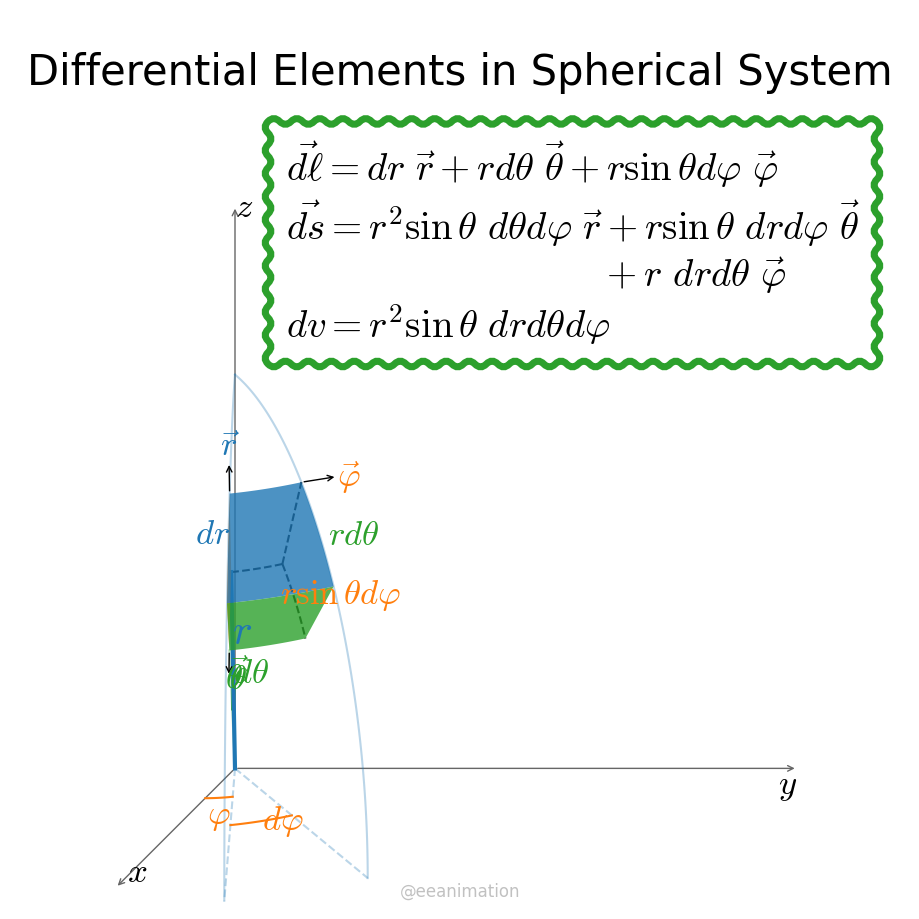

In [ ]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def d32(xyz):
  theta=np.pi/4
  x=xyz[1]-xyz[0]*np.sin(theta)/2
  y=xyz[2]-xyz[0]*np.cos(theta)/2
  return np.array([x,y])

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-.4,1.2];ylim=[-.25,1.35]
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim); ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax1.axis('off')
ax.text(np.sum(xlim)/2,1.2, 'Differential Elements in Spherical System', size=30,ha='center',va='bottom')
Nf = 250
pmax=[d32((.6,0,0)),d32((0,1,0)),d32((0,0,1))]
pmin=[d32((0,0,0)),d32((0,0,0)),d32((0,0,0))]
[ax.annotate('',pmax[k],pmin[k],arrowprops=dict(arrowstyle='->',lw=1,color='.4')) for k in range(3)] #x,y,z-axis
[ax.text(pmax[k][0],pmax[k][1],[r' $x$',r'$y$',r'$z$'][k],size=25,va=['bottom','top','center'][k],ha=['left','right','left'][k]) for k in range(3)]
phi=np.pi/4
phi_anim=np.linspace(np.pi/10,np.pi*.45,Nf)
theta_anim=np.linspace(np.pi/10,np.pi*.4,Nf)
dr,dtheta,dphi=.2,np.pi/10,np.pi/9
dtheta_list = np.linspace(0,dtheta,50)
dphi_list = np.linspace(0,dphi,50)
theta=np.pi/6
hp=np.linspace(0,.5*np.pi,100) #half pi list

def animate(ii):
  # ii=100
  if ii%50==0: print(ii)
  i=ii%len(phi_anim)
  ax1.clear(); ax1.set_xlim(xlim);ax1.set_ylim(ylim);ax1.axis('off')
  if ii//len(phi_anim)==0:
    p0=np.array([.5,theta,phi_anim[i]]) #r,theta,phi
  else:
    p0=np.array([.5,theta_anim[i],phi]) #r,theta,phi

  arc_theta1=d32([(p0[0]+dr)*np.sin(hp)*np.cos(p0[2]),(p0[0]+dr)*np.sin(hp)*np.sin(p0[2]),(p0[0]+dr)*np.cos(hp)]) #longtitude line at theta
  arc_theta2=d32([(p0[0]+dr)*np.sin(hp)*np.cos(p0[2]+dphi),(p0[0]+dr)*np.sin(hp)*np.sin(p0[2]+dphi),(p0[0]+dr)*np.cos(hp)]) #lontitude line at theta+dtheta
  p = [d32([p0[0]*np.sin(p0[1])*np.cos(p0[2]),p0[0]*np.sin(p0[1])*np.sin(p0[2]),p0[0]*np.cos(p0[1])])]
  p += [d32([p0[0]*np.sin(p0[1]+dtheta)*np.cos(p0[2]),p0[0]*np.sin(p0[1]+dtheta)*np.sin(p0[2]),p0[0]*np.cos(p0[1]+dtheta)])]
  p += [d32([(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.cos(p0[2]),(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.sin(p0[2]),(p0[0]+dr)*np.cos(p0[1]+dtheta)])]
  p += [d32([(p0[0]+dr)*np.sin(p0[1])*np.cos(p0[2]),(p0[0]+dr)*np.sin(p0[1])*np.sin(p0[2]),(p0[0]+dr)*np.cos(p0[1])])]
  p += [d32([p0[0]*np.sin(p0[1])*np.cos(p0[2]+dphi),p0[0]*np.sin(p0[1])*np.sin(p0[2]+dphi),p0[0]*np.cos(p0[1])])]
  p += [d32([p0[0]*np.sin(p0[1]+dtheta)*np.cos(p0[2]+dphi),p0[0]*np.sin(p0[1]+dtheta)*np.sin(p0[2]+dphi),p0[0]*np.cos(p0[1]+dtheta)])]
  p += [d32([(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.cos(p0[2]+dphi),(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.sin(p0[2]+dphi),(p0[0]+dr)*np.cos(p0[1]+dtheta)])]
  p += [d32([(p0[0]+dr)*np.sin(p0[1])*np.cos(p0[2]+dphi),(p0[0]+dr)*np.sin(p0[1])*np.sin(p0[2]+dphi),(p0[0]+dr)*np.cos(p0[1])])]
  phi_list = np.linspace(0,p0[2],50)
  theta_list = np.linspace(0,p0[1],50)
  arc_rdtheta1 = [d32([p0[0]*np.sin(p0[1]+dtheta_list[k])*np.cos(p0[2]),p0[0]*np.sin(p0[1]+dtheta_list[k])*np.sin(p0[2]),p0[0]*np.cos(p0[1]+dtheta_list[k])]) for k in range(len(dtheta_list))]
  arc_rdtheta2 = [d32([(p0[0]+dr)*np.sin(p0[1]+dtheta_list[k])*np.cos(p0[2]),(p0[0]+dr)*np.sin(p0[1]+dtheta_list[k])*np.sin(p0[2]),(p0[0]+dr)*np.cos(p0[1]+dtheta_list[k])]) for k in range(len(dtheta_list))]
  arc_rdtheta3 = [d32([(p0[0]+dr)*np.sin(p0[1]+dtheta_list[k])*np.cos(p0[2]+dphi),(p0[0]+dr)*np.sin(p0[1]+dtheta_list[k])*np.sin(p0[2]+dphi),(p0[0]+dr)*np.cos(p0[1]+dtheta_list[k])]) for k in range(len(dtheta_list))]
  arc_rdtheta4 = [d32([p0[0]*np.sin(p0[1]+dtheta_list[k])*np.cos(p0[2]+dphi),p0[0]*np.sin(p0[1]+dtheta_list[k])*np.sin(p0[2]+dphi),p0[0]*np.cos(p0[1]+dtheta_list[k])]) for k in range(len(dtheta_list))]
  arc_rsinThetadPhi1 = [d32([p0[0]*np.sin(p0[1])*np.cos(p0[2]+dphi_list[k]),p0[0]*np.sin(p0[1])*np.sin(p0[2]+dphi_list[k]),p0[0]*np.cos(p0[1])]) for k in range(len(dphi_list))]
  arc_rsinThetadPhi2 = [d32([p0[0]*np.sin(p0[1]+dtheta)*np.cos(p0[2]+dphi_list[k]),p0[0]*np.sin(p0[1]+dtheta)*np.sin(p0[2]+dphi_list[k]),p0[0]*np.cos(p0[1]+dtheta)]) for k in range(len(dphi_list))]
  arc_rsinThetadPhi3 = [d32([(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.cos(p0[2]+dphi_list[k]),(p0[0]+dr)*np.sin(p0[1]+dtheta)*np.sin(p0[2]+dphi_list[k]),(p0[0]+dr)*np.cos(p0[1]+dtheta)]) for k in range(len(dphi_list))]
  arc_rsinThetadPhi4 = [d32([(p0[0]+dr)*np.sin(p0[1])*np.cos(p0[2]+dphi_list[k]),(p0[0]+dr)*np.sin(p0[1])*np.sin(p0[2]+dphi_list[k]),(p0[0]+dr)*np.cos(p0[1])]) for k in range(len(dphi_list))]

  arc1line= d32([p0[0]*np.sin(p0[1])*np.cos(p0[2]+dphi_list),p0[0]*np.sin(p0[1])*np.sin(p0[2]+dphi_list),p0[0]*np.cos(p0[1])])
  arc2line= d32([p0[0]*np.sin(p0[1]+dtheta_list)*np.cos(p0[2]+dphi),p0[0]*np.sin(p0[1]+dtheta_list)*np.sin(p0[2]+dphi),p0[0]*np.cos(p0[1]+dtheta_list)])
  arc3line= d32([.3*p0[0]*np.cos(phi_list),.3*p0[0]*np.sin(phi_list),0*phi_list]) #arc phi
  arc4line= d32([.6*p0[0]*np.cos(p0[2]+dphi_list),.6*p0[0]*np.sin(p0[2]+dphi_list),0*phi_list]) #arc dphi
  arc5line= d32([.3*p0[0]*np.sin(theta_list)*np.cos(p0[2]),.3*p0[0]*np.sin(theta_list)*np.sin(p0[2]),.3*p0[0]*np.cos(theta_list)]) #arc theta
  arc6line= d32([.5*p0[0]*np.sin(dtheta_list+p0[1])*np.cos(p0[2]),.5*p0[0]*np.sin(p0[1]+dtheta_list)*np.sin(p0[2]),.5*p0[0]*np.cos(p0[1]+dtheta_list)]) #arc dtheta

  verts=[p[0]]+arc_rdtheta1+[p[1],p[2]]+arc_rdtheta2[::-1]+[p[3]]+[(0,0)] #plane normal to vec phi
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(3+2*len(dtheta_list)) + [path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),ec='none',fc=cl[1],lw=2,joinstyle='round',alpha=.8,zorder=3))
  verts=arc_rsinThetadPhi3+arc_rdtheta3[::-1]+arc_rsinThetadPhi4[::-1]+arc_rdtheta2+[(0,0)] #plane normal to vec r
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(len(dphi_list)*4-1) + [path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),ec='none',fc=cl[0],lw=2,joinstyle='round',alpha=.8,zorder=3))
  verts=arc_rsinThetadPhi2+arc_rsinThetadPhi3[::-1]+[(0,0)] #rho-phi plane
  codes=[path.Path.MOVETO]+[path.Path.LINETO]*(2*len(dphi_list)-1) + [path.Path.CLOSEPOLY]
  ax1.add_patch(patches.PathPatch(path.Path(verts,codes),ec='none',fc=cl[2],lw=2,joinstyle='round',alpha=.8,zorder=3))
  ax1.annotate('',p[3]+d32([dr*.4*np.sin(p0[1])*np.cos(p0[2]),dr*.4*np.sin(p0[1])*np.sin(p0[2]),dr*.4*np.cos(p0[1])]),p[3],arrowprops=dict(arrowstyle='->',lw=1,color='k'))
  ax1.text(p[3][0]+d32([dr*.4*np.sin(p0[1])*np.cos(p0[2]),dr*.4*np.sin(p0[1])*np.sin(p0[2]),dr*.4*np.cos(p0[1])])[0],
           p[3][1]+d32([dr*.4*np.sin(p0[1])*np.cos(p0[2]),dr*.4*np.sin(p0[1])*np.sin(p0[2]),dr*.4*np.cos(p0[1])])[1],r'$\vec r$',c=cl[0],size=25,va='bottom',ha='center')
  ax1.annotate('',p[7]+(p[7]-p[3])*.5,p[7],arrowprops=dict(arrowstyle='->',lw=1,color='k'))
  ax1.text((p[7]+(p[7]-p[3])*.5)[0], (p[7]+(p[7]-p[3])*.5)[1],r'$\vec\varphi$',c=cl[1],size=25,va='center',ha='left')
  ax1.annotate('',d32([p0[0]*np.sin(p0[1]+dtheta*1.3)*np.cos(p0[2]),p0[0]*np.sin(p0[1]+dtheta*1.3)*np.sin(p0[2]),p0[0]*np.cos(p0[1]+dtheta*1.3)]),
               p[1],arrowprops=dict(arrowstyle='->',lw=1,color='k'))
  ax1.text(d32([p0[0]*np.sin(p0[1]+dtheta*1.3)*np.cos(p0[2]),p0[0]*np.sin(p0[1]+dtheta*1.3)*np.sin(p0[2]),p0[0]*np.cos(p0[1]+dtheta*1.3)])[0],
           d32([p0[0]*np.sin(p0[1]+dtheta*1.3)*np.cos(p0[2]),p0[0]*np.sin(p0[1]+dtheta*1.3)*np.sin(p0[2]),p0[0]*np.cos(p0[1]+dtheta*1.3)])[1],r'$\vec\theta$',c=cl[2],size=25,va='center',ha='left')
  ax1.text(.5*(p[0]+p[3])[0],.5*(p[0]+p[3])[1],r'$dr$',c=cl[0],size=25,va='center',ha='right')
  ax1.text(.5*(p[2]+p[6])[0],.5*(p[2]+p[6])[1],r'$r\sin\theta d\varphi$',c=cl[1],size=25,va='center',ha='left')
  ax1.text(.5*(p[6]+p[7])[0],.5*(p[6]+p[7])[1],r' $rd\theta$',c=cl[2],size=25,va='center',ha='left')
  ax1.plot(arc1line[0],arc1line[1],'--k',lw=1.5) #arc \rho dphi
  ax1.plot(arc2line[0],arc2line[1],'--k',lw=1.5) #arc \rho dphi
  ax1.plot([p[4][0],p[7][0]],[p[4][1],p[7][1]],'--k',lw=1.5)
  ax1.plot(arc_theta1[0],arc_theta1[1],c=cl[0],lw=1.5,alpha=.3) #arc r at theta
  ax1.plot([0,arc_theta1[0,-1]],[0,arc_theta1[1,-1]],'--',c=cl[0],lw=1.5,alpha=.3) #arc \rho at theta
  ax1.plot(arc_theta2[0],arc_theta2[1],c=cl[0],lw=1.5,alpha=.3) #line r at theta+dtheta
  ax1.plot([0,arc_theta2[0,-1]],[0,arc_theta2[1,-1]],'--',c=cl[0],lw=1.5,alpha=.3) #arc \rho at theta+dtheta
  ax1.plot([0,p[1][0]],[0,p[1][1]],c=cl[2],lw=1.5,alpha=.3) #line r at theta+dtheta
  ax1.plot(arc3line[0],arc3line[1],c=cl[1],lw=1.5) #arc phi
  ax1.plot(arc4line[0],arc4line[1],c=cl[1],lw=1.5) #arc dphi
  ax1.plot(arc5line[0],arc5line[1],c=cl[2],lw=1.5) #arc theta
  ax1.plot(arc6line[0],arc6line[1],c=cl[2],lw=1.5) #arc dtheta
  ax1.plot([0,p[0][0]],[0,p[0][1]],c=cl[0],lw=3) # r
  ax1.text(arc3line[0][25],arc3line[1][25],r'$\varphi$',c=cl[1],size=25,va='top',ha='center') # phi
  ax1.text(arc4line[0][25],arc4line[1][25],r'$d\varphi$',c=cl[1],size=25,va='center',ha='left') # dphi
  ax1.text(arc5line[0][25],arc5line[1][25],r'$\theta$',c=cl[2],size=25,va='bottom',ha='center') # theta
  ax1.text(arc6line[0][25],arc6line[1][25],r'$d\theta$',c=cl[2],size=25,va='bottom',ha='left') # dtheta
  ax1.text(p[0][0]*.7,p[0][1]*.7,r'$r$',c=cl[0],size=30,va='center',ha='left') #arc phi
  return
ax.text(.6,.75,r'$\vec{d\ell}=dr\ \vec r+r d\theta\ \vec\theta + r\sin\theta d\varphi\ \vec\varphi$' +'\n'+
              r'$\vec{ds}=r^2 \sin\theta\ d\theta d\varphi\ \vec r+r\sin\theta\ dr d\varphi\ \vec\theta$'+'\n' +
        r'$\hspace{9.2}+ r\ dr d\theta\ \vec\varphi$' +'\n'+
        r'$dv = r^2\sin\theta\ dr d\theta d\varphi$', size=28,ha='center',va='bottom',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.6,facecolor='none',edgecolor=cl[2],lw=5))

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
# fig.savefig('diffEle_cylindrical.png',dpi=300)
anim = animation.FuncAnimation(fig, animate, frames=Nf*2, interval=20)
anim.save("differential_sph.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)